In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
columnas = ["sepal length","sepal width","petal length","petal width","class"]

df = pd.read_csv("Dataset/iris.data", header=None, names=columnas)

In [3]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Implementación de métodos:

### Logistic Regresion:

In [4]:
# importamos librerias, LogisticRegression para el metodo, train_test_split para hacer la division
# de los datos y las métricas
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# dividimos entre las caracteristicas y las clases
X = df.drop('class', axis=1) 
y = df['class']

# se hace la partición del df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=200)

# se entrena el modelo
model.fit(X_train, y_train)

# se predicen los datos de testeo
y_pred = model.predict(X_test)

#métricas
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')
print('\nMatriz de confusión:')
print(conf_matrix)
print('\nReporte de clasificación:')
print(class_report)

Accuracy: 100.00%

Matriz de confusión:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Reporte de clasificación:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



### SVM:

In [5]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm_model = SVC(kernel='linear') 

svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')
print('\nMatriz de confusión:')
print(conf_matrix)
print('\nReporte de clasificación:')
print(class_report)

Accuracy: 100.00%

Matriz de confusión:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Reporte de clasificación:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



### Decision Tree:

In [6]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tree_model = DecisionTreeClassifier(criterion="entropy", max_depth=2, random_state=42)

tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)


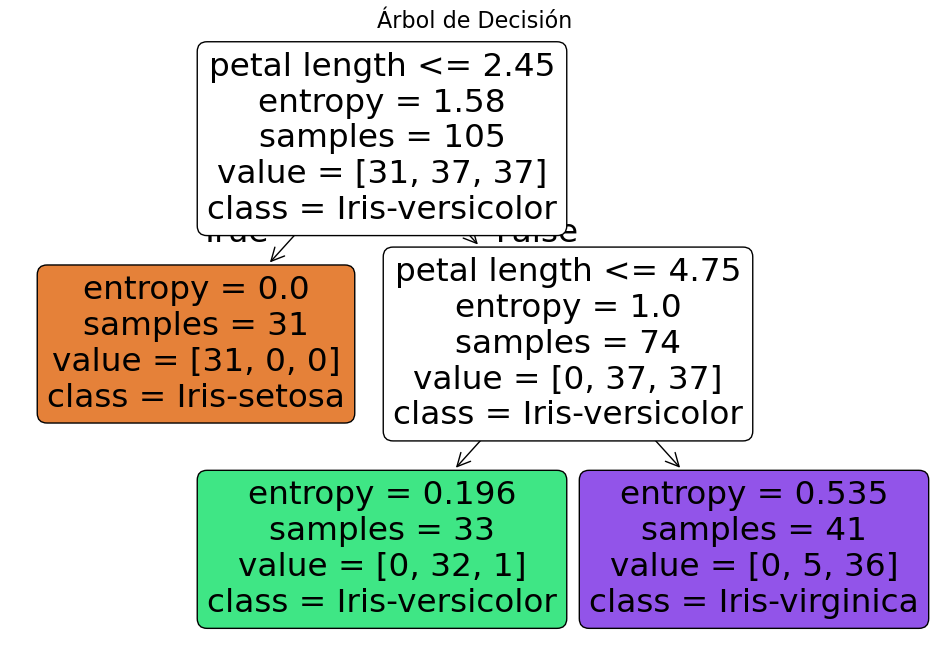

In [7]:
plt.figure(figsize=(12, 8))
plot_tree(tree_model, filled=True, feature_names=X.columns, class_names=y.unique(), rounded=True, proportion=False)
plt.title("Árbol de Decisión", fontsize=16)
plt.show()

In [8]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión: {accuracy:.2f}")
report = classification_report(y_test, y_pred, target_names=y.unique())
print(report)


Precisión: 0.98
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.97        45
   weighted avg       0.98      0.98      0.98        45



## Hyperparámetros:

### 1. Logistic Regresion:

#### 1.1. C: (inversa de la regularización). (Por defecto: '1.0')

#### Descripción: 
Controla la regularización L2 en el modelo. Un valor alto de C significa menos regularización (el modelo se ajustará más a los datos), mientras que un valor bajo de C significa más regularización (el modelo será más simple y generalizará mejor).

In [9]:
model = LogisticRegression(C=1.0)

#### 1.2. solver: Método de optimización. (Por defecto: 'lbfgs')

#### Descripción: 
Especifica el algoritmo utilizado para optimizar la función de coste de la regresión logística.

#### Opciones comunes:
- 'liblinear': Un algoritmo eficiente para pequeños conjuntos de datos y modelos binarios.
- 'newton-cg': Utiliza el método de Newton para optimizar, bueno para problemas más grandes y multiclasificación.
- 'lbfgs': Un optimizador quasi-Newton que funciona bien para problemas más grandes.
- 'saga': Algoritmo de optimización que también es eficiente con grandes datasets y permite la regularización elastic net.

In [10]:
model = LogisticRegression(solver='lbfgs')

#### 1.3. penalty: Tipo de regularización. (Por defecto: 'l2')

#### Descripción: 
Tipo de regularización utilizada en la regresión logística. En general, los dos tipos más comunes son:

- L2: Regularización de Ridge, que es la más común y la que se usa por defecto.
- L1: Regularización de Lasso, que puede inducir una sparsidad (es decir, hacer que algunos coeficientes del modelo sean cero).
- elasticnet: Combinación de L1 y L2, útil cuando se desea un equilibrio entre ambos.

In [11]:
model = LogisticRegression(penalty='l2')

#### 1.4. max_iter: Número máximo de iteraciones para la optimización. (Por defecto: 100)

#### Descripción: 
Número máximo de iteraciones que el algoritmo puede realizar durante la optimización.

In [12]:
model = LogisticRegression(max_iter=100)

#### 1.5. tol: determina la precisión de la convergencia en el proceso de optimización. (Por defecto: 1e-4)

#### Descripción: 
Determina la tolerancia para la convergencia del optimizador. Si la mejora entre iteraciones sucesivas es menor que esta tolerancia, el algoritmo se detiene.

In [13]:
model = LogisticRegression(tol=1e-4)

### 2. SVM:

#### 2.1. C: (parametro de penalización) Controla el margen y los errores. (Por defecto: C=1.0)

#### Descripción: 
Similar al de la regresión logística, C es un parámetro que controla el equilibrio entre el margen máximo (generalización) y los errores de clasificación en el conjunto de entrenamiento.

In [14]:
model = SVC(C=1.0)

#### 2.2. kernel: Funcion nucleo (Por defecto: 'rbf')

#### Descripción: 
Define el tipo de función de núcleo que se usa para transformar los datos en un espacio de características de mayor dimensión, donde se pueden encontrar los márgenes óptimos.

##### tipos de kernel:
- 'linear': El núcleo lineal es adecuado para problemas donde las clases son separables de manera lineal.
- 'poly': El núcleo polinómico se usa cuando las clases no son lineales pero pueden separarse mediante un polinomio.
- 'rbf' (Radial Basis Function): Es el núcleo más común, utilizado cuando las clases son no lineales y separables mediante una función gaussiana.
- 'sigmoid': Menos común, utilizado para problemas no lineales con una frontera de decisión sigmoidea.

In [15]:
model = SVC(kernel='rbf')

#### 2.3. gamma: Parámetro del núcleo. (Por defecto: 'scale')

#### Descripción: 
El parámetro gamma controla el alcance de la influencia de un solo punto de datos sobre la clasificación.

In [16]:
model = SVC(gamma='scale')

#### 2.4. degree: Grado del polinomio para el kernel 'poly'. (Por defecto: degree=3)

#### Descripción: 
Este parámetro es relevante solo cuando se usa el núcleo polinómico ('poly'). Especifica el grado del polinomio utilizado para mapear los datos al espacio de características.

In [17]:
model = SVC(kernel='poly', degree=3)

#### 2.5. shrinking: Usar heurística de "shrinking". (Por defecto: shrinking=True)

#### Descripción: 
Este parámetro indica si se debe utilizar la heurística de "shrinking" durante la optimización del SVM.

- 'True': Aplica la heurística de "shrinking", lo que puede hacer que el algoritmo converja más rápido al eliminar ciertos puntos durante el entrenamiento.
- 'False': No se aplica la heurística de "shrinking", lo que puede hacer el proceso más lento pero más exhaustivo.

In [18]:
model = SVC(shrinking=True)

### 3. Decision Tree:

#### 3.1. max_depth: Profundidad máxima del árbol. (Por defecto: max_depth=None)

#### Descripción: 
Este parámetro controla la profundidad máxima del árbol de decisión, es decir, cuántos niveles de nodos puede tener el árbol.

- Un valor alto de max_depth permite que el árbol crezca más y capture patrones más complejos, lo que puede llevar a sobreajuste si es demasiado alto.
- Un valor bajo de max_depth limita el crecimiento del árbol y hace que el modelo sea más general y menos propenso a sobreajustar.

#### Valor por defecto: 
max_depth=None (lo que significa que el árbol se expandirá hasta que cada hoja contenga menos de min_samples_split muestras).

In [25]:
model = DecisionTreeClassifier(max_depth=5)

#### 3.2. min_samples_split: Número mínimo de muestras requeridas para dividir un nodo. (Por defecto: min_samples_split=2)

#### Descripción: 
Especifica el número mínimo de muestras requeridas para dividir un nodo interno.

- Un valor bajo de min_samples_split permitirá que el árbol se divida en nodos más pequeños, lo que puede llevar a sobreajuste.
- Un valor alto de min_samples_split hará que el árbol no divida los nodos a menos que haya un número suficiente de muestras, lo que hace que el modelo sea más generalizable.

In [24]:
model = DecisionTreeClassifier(min_samples_split=10)

#### 3.3. min_samples_leaf: Número mínimo de muestras en una hoja. (Por defecto: min_samples_leaf=1)

#### Descripción: 
Controla el número mínimo de muestras que debe tener una hoja para considerarse válida.
- Un valor bajo de min_samples_leaf puede generar muchas hojas pequeñas, lo que puede llevar a sobreajuste.
- Un valor alto hace que las hojas contengan más muestras y, por lo tanto, puede reducir el sobreajuste.

In [23]:
model = DecisionTreeClassifier(min_samples_leaf=1)

#### 3.4. max_features: Número máximo de características a considerar en cada división. (Por defecto: max_features=None)


#### Descripción: 
Especifica el número máximo de características que se deben considerar al buscar la mejor división para un nodo.

- Si se ajusta a un valor pequeño, reduces la complejidad del modelo y puedes ayudar a evitar el sobreajuste, pero también puede reducir la precisión.
- Si se establece como 'auto' o 'sqrt', utiliza la raíz cuadrada del número total de características. 'log2' usa el logaritmo en base 2 del número de características.

In [22]:
model = DecisionTreeClassifier(max_features='None')

#### 3.5. criterion: Función de calidad de la división. (Por defecto: criterion='gini')

#### Descripción: 
Controla la función de evaluación utilizada para medir la calidad de las divisiones en el árbol.

- 'gini': Usa el índice de Gini, que mide la pureza de las divisiones. Es el valor por defecto.
- 'entropy': Usa la entropía, que mide la incertidumbre o la impureza de las divisiones.

In [20]:
model = DecisionTreeClassifier(criterion='gini')